# Превысит ли средний зарaботок человека порог 50 000$ в год?


In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

# Назначаем имена колонок

In [35]:
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

In [36]:
numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

#этот метод разделит датасет по колонкам, как в массиве columns

In [37]:
df.columns = columns.split()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educ-num        32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:
df.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [40]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
educ-num          0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [41]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [42]:
df = df.replace('?', np.nan)
df = df.dropna()

# Будем предсказывать 1 (True), если зарплата больше 50K, 0 (False) иначе

In [43]:
df['salary'] = df['salary'].apply((lambda x: x==' >50K'))

In [ ]:
numeric_data = df[df.columns[numeric_indices]]
categorial_data = df[df.columns[categorical_indices]]

In [ ]:
dummy_features = pd.get_dummies(categorial_data)

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df['salary']

In [ ]:
y.mean()

0.24081695331695332

# Разбиение данных на train и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

# Нормировка данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Логистическая** **регрессия** 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

Train roc-auc: 0.9097951317391813
Test roc-auc: 0.9045236449170785


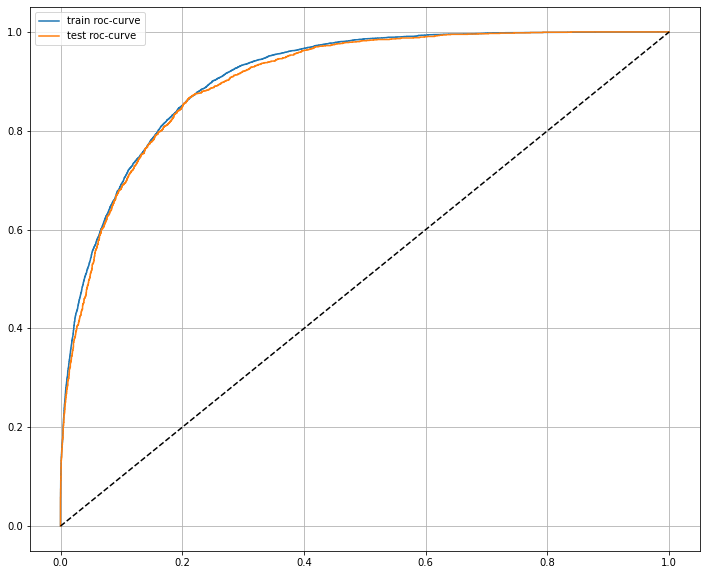

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

# Перебор параметров по сетке. Качество измеряем с помощью кроссвалидации

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def search(X, y, model, param_name, grid, draw=True):
  parameters = {param_name: grid}

  CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
  CV_model.fit(X, y)
  means = CV_model.cv_results_['mean_test_score']
  error = CV_model.cv_results_['std_test_score']

  if draw:
      plt.figure(figsize=(15,8))
      plt.title('choose ' + param_name)


      plt.plot(grid, means, label='mean values of score')

      plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
      plt.legend()
      plt.xlabel('parameter')
      plt.ylabel('roc_auc')
      plt.show()
        
  return means, error

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# models = [KNeighborsClassifier(n_jobs=-1)]
# param_names = ['n_neighbors']
# grids = [np.array(np.linspace(4, 25, 10), dtype='int')]
# param_scales = ['ordinary']

# for model, param_name, grid, param_scale in zip(models, 
#                                                 param_names, 
#                                                 grids, 
#                                                 param_scales):
#     search(X_train, y_train, model, param_name, grid, param_scale)

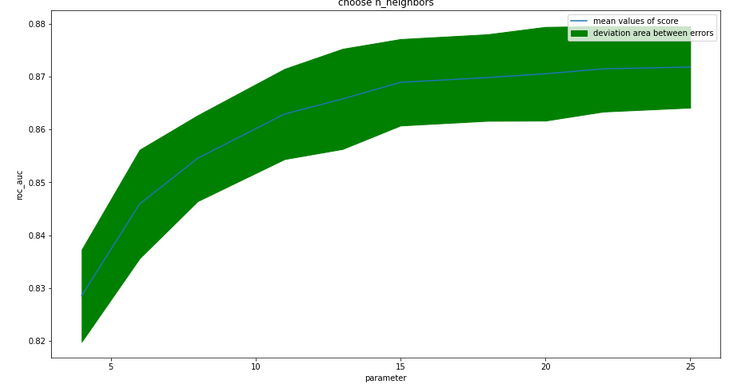

Train roc-auc: 0.8957742384302252
Test roc-auc: 0.8769954996855676


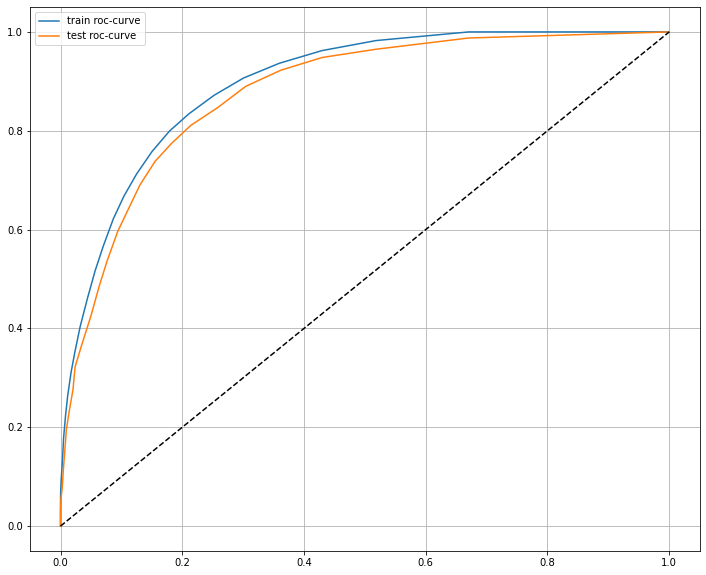

In [ ]:
model = KNeighborsClassifier(n_neighbors=25, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

# **DECISION TREE**

In [45]:
# models = [DecisionTreeClassifier()]
# param_names = ['max_depth']
# grids = [np.arange(3, 21, 2)]
# param_scales = ['ordinary']

# for model, param_name, grid, param_scale in zip(models, 
#                                                 param_names, 
#                                                 grids, 
#                                                 param_scales):
#     search(X_train, y_train, model, param_name, grid, param_scale) 

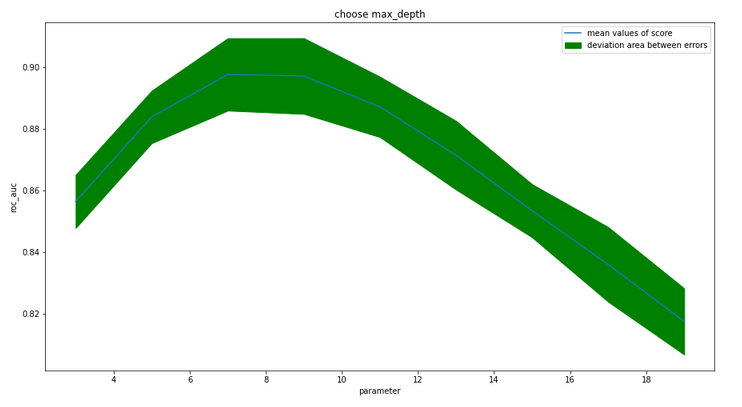

Train roc-auc: 0.9080521219813292
Test roc-auc: 0.8978654496182468


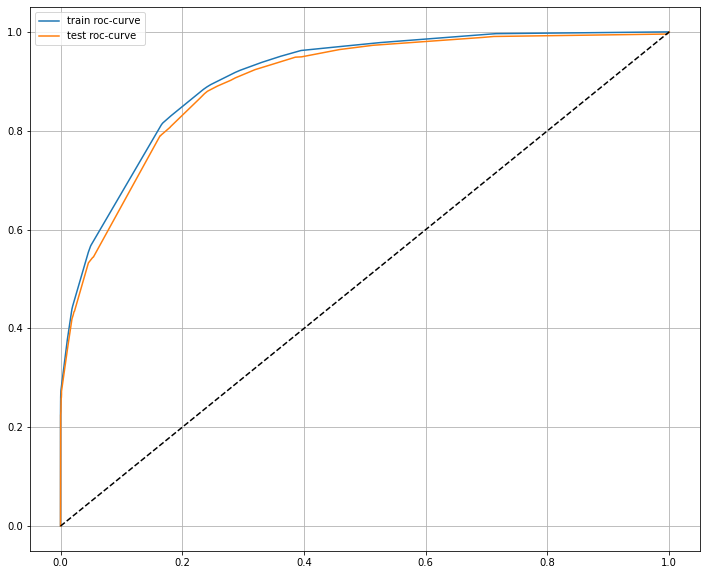

In [46]:
model = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

# **RANDOM FOREST**

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
models = [RandomForestClassifier(n_jobs=-1)]
param_names = ['n_estimators']
grids = [[10, 20, 30, 50, 75, 100, 150]]
param_scales = ['ordinary']

In [49]:
# for model, param_name, grid, param_scale in zip(models, 
#                                                 param_names, 
#                                                 grids, 
#                                                 param_scales):
#     search(X_train, y_train, model, param_name, grid, param_scale)

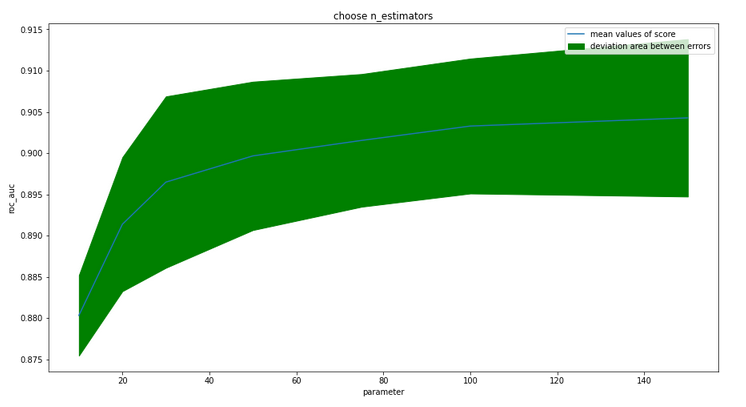

Train roc-auc: 0.9999999878334968
Test roc-auc: 0.9021941867285319


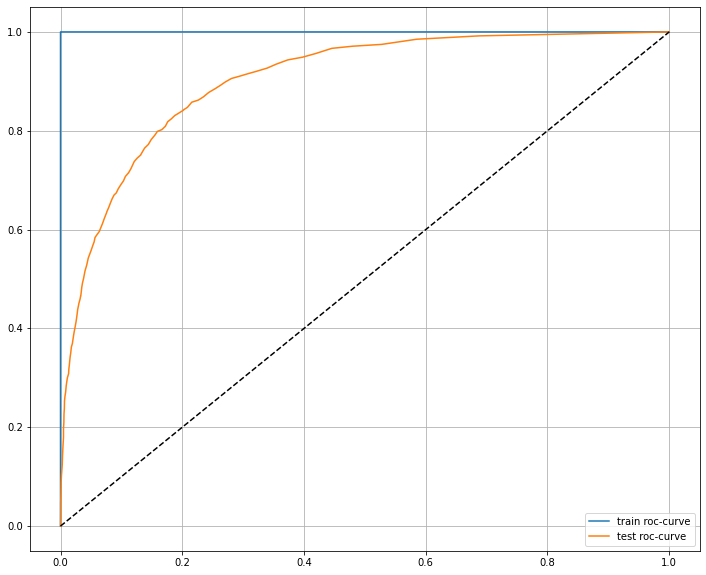

In [50]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

# **Бустинг**

In [51]:
import xgboost

In [53]:
# models = [xgboost.XGBClassifier(n_estimators=200)]
# param_names = ['max_depth']
# grids = [np.arange(3,10,2)]
# param_scales = ['ordinary']

# for model, param_name, grid, param_scale in zip(models, 
#                                                 param_names, 
#                                                 grids, 
#                                                 param_scales):
#     search(X_train, y_train, model, param_name, grid, param_scale)

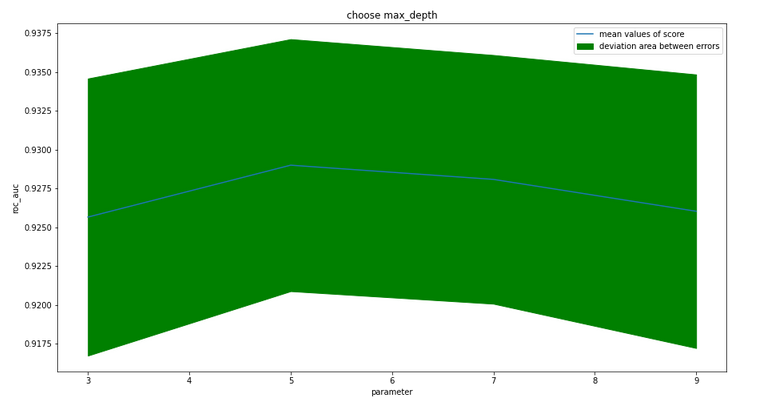

Train roc-auc: 0.953251821222124
Test roc-auc: 0.9271899917763822


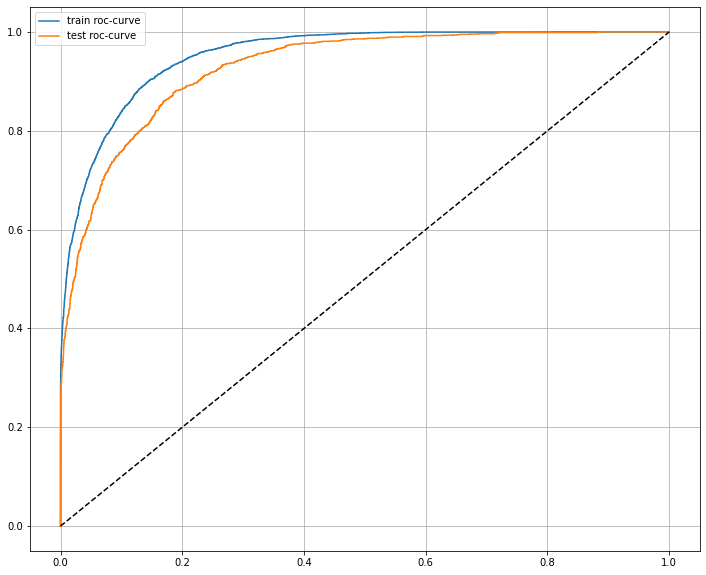

In [55]:
model = xgboost.XGBClassifier(max_depth=5, n_estimators=300).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)